In [177]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor
import matplotlib.pyplot as plt
import numpy as np
import cv2
import sys
import os
import random
from floods.utils.gis import imread
from floods.utils.gis import rgb_ratio

In [168]:
sam_checkpoint = "/home/gabrielidis/Project/segment-anything/sam_vit_l_0b3195.pth"
model_type = "vit_l"

device = "cpu"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)
mask_generator = SamAutomaticMaskGenerator(sam)


In [169]:
FOLDER_PATH = "/home/gabrielidis/These/flood/mmflood/processed_data/val"

In [170]:
random_file = random.choice(os.listdir(FOLDER_PATH + "/sar/"))
print(random_file)
sar = imread(FOLDER_PATH + "/sar/" + random_file)
ground_truth_mask = imread(FOLDER_PATH + "/mask/" + random_file)[0]
ground_truth_mask.shape, sar.shape


EMSR421-4-0_269_16.tif


((512, 512), (2, 512, 512))

In [175]:
sar2rgb = rgb_ratio(sar, channels_first = True, dtype = np.uint8)
vv = sar[0]
vh = sar[1]
vv_image = np.stack([vv,vv,vv], axis = -1)
vh_image = np.stack([vh,vh,vh], axis = -1) 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


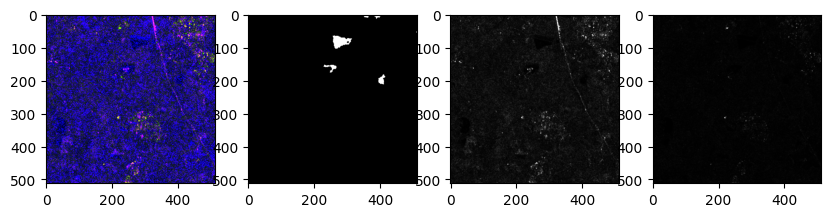

In [176]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize = (10,10))
ax1.imshow(sar2rgb)
ax2.imshow(ground_truth_mask, cmap = "gray")
ax3.imshow(vv_image)
ax4.imshow(vh_image)

In [173]:
masks = mask_generator.generate(sar2rgb)

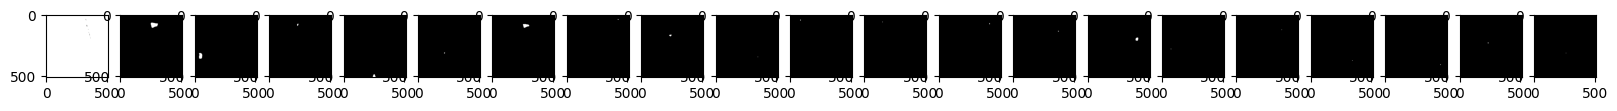

In [174]:
fig, axs = plt.subplots(1,len(masks), figsize = (20,20))
for index,mask in enumerate(masks):
    axs[index].imshow(mask["segmentation"], cmap = "gray")

In [180]:
masks[0].keys()

dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])